# Week 3 - Capstone Project
## Segmenting and Clustering Neighborhoods in Toronto

In this assignment, we are required to explore and cluster the neighborhoods in Toronto, Canada.

First, we need to scrape the following Wikipedia page, <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" >List of Postal Codes in Canada</a>, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas  dataframe like the one shown below:

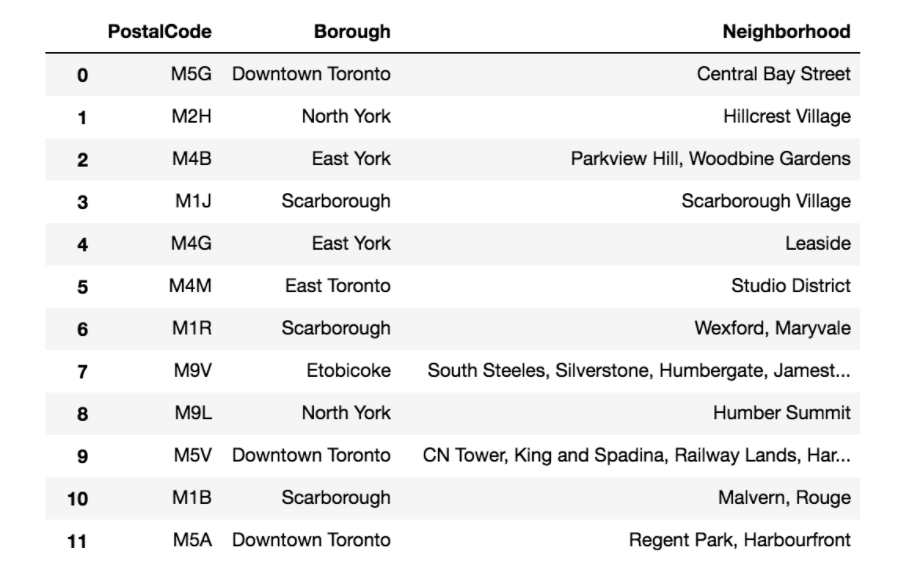

There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas  to read the table into a pandas dataframe.
Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: <a href="http://beautiful-soup-4.readthedocs.io/en/latest/" > Beautiful Soup</a>.

##### Web Scraping

In [57]:
import numpy as np

In [58]:
# First let's try using pandas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
table1 = pd.read_html(wiki_url, attrs = {"class" : "wikitable"}, header = 0)  # attrs: dict of attributes that you can pass to use to identify the table in the HTML. # you have to inspect html to find the code.
print(f"Extracted {len(table1)} table.")
table1[0].head()   #  html tables get saved as a list, where the first (and only if only 1) element is the table as a df

Extracted 1 table.


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [59]:
# Now using beautiful soup
# https://github.com/softhints/python/blob/master/notebooks/Scrape%20wiki%20tables%20with%20pandas%20and%20python.ipynb
# https://www.youtube.com/watch?v=ICXR9nDbudk&list=LL&index=4&ab_channel=JieJenn
# https://www.youtube.com/watch?v=xERYe99UTPc&list=LL&index=2&ab_channel=FalconInfomatic
import requests
from bs4 import BeautifulSoup

wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
response = requests.get(wiki_url)
soup = BeautifulSoup(response.content, "html.parser")
my_table = soup.find('table', {"class" : "wikitable"})
# my_table = soup.find('table', attrs = "wikitable")
# my_table = soup.find('table', class = "wikitable")
df = pd.read_html(str(my_table))
print(f"Extracted {len(df)} table.")
df = df[0] #  html tables get saved as a list, where the first (and only if only 1) element is the table as a df
df.head()

Extracted 1 table.


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

##### Clean Dataframe

In [60]:
print(df["Borough"].unique())
df = df[df["Borough"] != "Not assigned"].reset_index(drop = True)  # alternative: df.query('Bourough != "Not assigned"')
df.rename(columns = {"Neighbourhood": "Neighborhood"}, inplace = True)
df.head()

['Not assigned' 'North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough'
 'East York' 'York' 'East Toronto' 'West Toronto' 'Central Toronto'
 'Mississauga']


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above example table.
- If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [61]:
print(df.shape)

(103, 3)


Now that we have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. We will use the Geocoder Python package: <a href='https://geocoder.readthedocs.io/index.html'> Geocoder</a>.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:

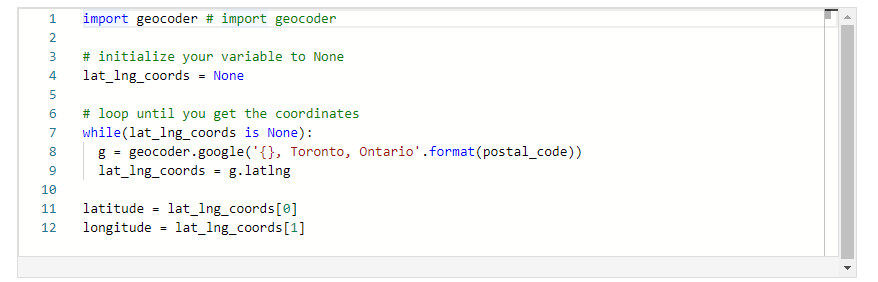

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: <a href="http://cocl.us/Geospatial_data" >Geocoder</a>.

**Important Note**: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Use the Geocoder package or the csv file to create the following dataframe:

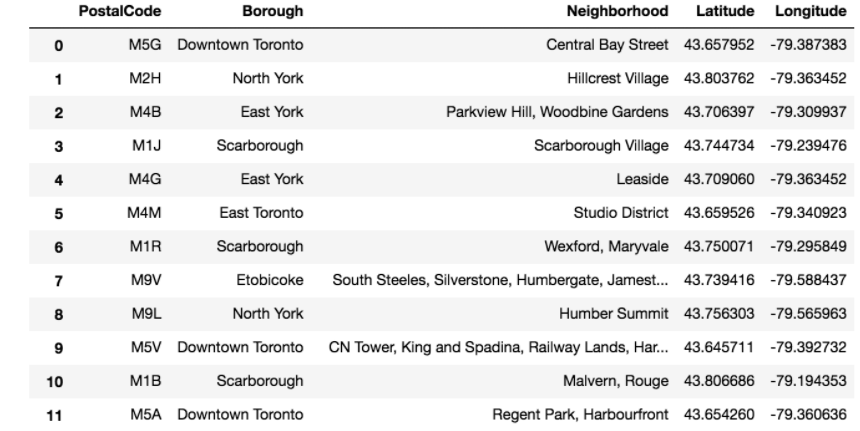

##### Merge with coordinates

In [62]:
# !pip install geocoder
# import geocoder
# lat_lng_coord = None
# i = 0

# while (lat_lng_coord is None):
#     g = geocoder.google('Mountain View, CA')
#     lat_lng_coord = g.latlng
#     i+=1
    
# lat = lat_lng_coords[0] ,lng = lat_lng_coords[1]
# print(i)   # got to i = 605 and nothing printed...
# just to check

In [63]:
# Failed attempt to use geocoder so we will use the csv file instead
geospatial_data = pd.read_csv("Geospatial_Coordinates.csv")
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [64]:
# Let's merge the dataframes
canada_geo = df.merge(geospatial_data, how = "inner", left_on = 'Postal Code', right_on = 'Postal Code')
canada_geo.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Explore and cluster the neighborhoods in Toronto. We can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

    -to add enough Markdown cells to explain what you decided to do and to report any observations you make. 
    -to generate maps to visualize your neighborhoods and how they cluster together. 

Based on previous labs, we will cluster neighborhoods based on venue categories using the foursquare API and Kmeans clustering, within Toronto.

In [65]:
#!pip install geopy
from geopy.geocoders import Nominatim 

In [66]:
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent = "toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geographical coordinates of {address} are {latitude}, {longitude}.')

The geographical coordinates of Toronto, Ontario are 43.6534817, -79.3839347.


#### Now let's create a map of Toronto with neighborhoods superimposed on top.

In [67]:
# !conda install -c conda-forge folium
!pip install folium
import folium

In [68]:
# Creating the map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for latitude, longitude, borough, neighborhood in zip(canada_geo['Latitude'], canada_geo['Longitude'], canada_geo['Borough'], canada_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_Toronto)  
    
map_Toronto

#### Next, let's use the Foursquare API to explore the neighborhoods and segment them.

In [69]:
CLIENT_ID = 'REL4BWSAEJDWA5WDIOAK40BD2552Q1KUVLFVWXUIQ5EHEL4W' # your Foursquare ID
CLIENT_SECRET = 'B52MV330NCVAD2LSR1GKG2VNHRTRQOW3DK1K0FWV2NOAY3S1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: REL4BWSAEJDWA5WDIOAK40BD2552Q1KUVLFVWXUIQ5EHEL4W
CLIENT_SECRET:B52MV330NCVAD2LSR1GKG2VNHRTRQOW3DK1K0FWV2NOAY3S1


Let's create a function to return all the venues in Toronto.

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now we'll run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [71]:
toronto_venues = getNearbyVenues(names=canada_geo['Neighborhood'],
                                   latitudes=canada_geo['Latitude'],
                                   longitudes=canada_geo['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

Let's check the size of the dataframe and the first few rows.

In [72]:
print(toronto_venues.shape)
toronto_venues.head()

(2105, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


Let's see how many venues were returned for each neighborhood.

In [73]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,57,57,57,57,57,57
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",14,14,14,14,14,14


Let's find out hoy many unique venue categories there are.

In [74]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


#### Now we'll analyze each neighborhood.  
First we'll apply one hot encoding.

In [75]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [76]:
print(f"The onehot encoded dataframe is size {toronto_onehot.shape}.")

The onehot encoded dataframe is size (2105, 268).


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [77]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0

In [78]:
print(f"The size of the toronto_grouped dataframe is {toronto_grouped.shape}.")

The size of the toronto_grouped dataframe is (95, 268).


Let's print each neighborhood along with the top 5 most common venues.

In [79]:
num_top_venues = 5
for hood in toronto_grouped["Neighborhood"]:
    print("-----"+hood+"-----")
    temp = toronto_grouped[toronto_grouped["Neighborhood"] == hood].T.reset_index()  #Transposes row vector to column vector and resets index, making the prior index name a new column, and the other (old) columns, are now in 1 column, spread on each row,  with the first column being the name (neighborhood/venue) and the second column the freq value (mean). So a row vector is converted into a 2 column dataframe, with a new secuential index
    temp.columns = ["Venue", "freq"]  # renaming columns on transposed df
    temp = temp.iloc[1:]  # removes first row (neighborhood and name (hood)) from df
    temp["freq"] = temp["freq"].astype(float)  # freq to float
    temp = temp.round({"freq": 2})  # rounds 2 decimal points of only column "freq" 
    print(temp.sort_values("freq", ascending = False).reset_index(drop = True).head(num_top_venues))
    print("\n")

-----Agincourt-----
                       Venue  freq
0             Breakfast Spot   0.2
1                     Lounge   0.2
2             Clothing Store   0.2
3  Latin American Restaurant   0.2
4               Skating Rink   0.2


-----Alderwood, Long Branch-----
          Venue  freq
0   Pizza Place  0.25
1  Skating Rink  0.12
2  Dance Studio  0.12
3   Coffee Shop  0.12
4           Pub  0.12


-----Bathurst Manor, Wilson Heights, Downsview North-----
                 Venue  freq
0                 Bank  0.10
1          Coffee Shop  0.10
2        Deli / Bodega  0.05
3  Fried Chicken Joint  0.05
4     Sushi Restaurant  0.05


-----Bayview Village-----
                 Venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


-----Bedford Park, Lawrence Manor East-----
                Venue  freq
0         Coffee Shop  0.08
1  Italian Restaurant  0.08
2         Pizza Place  0.08
3      Sa

                           Venue  freq
0                           Café  0.08
1  Vegetarian / Vegan Restaurant  0.07
2                    Coffee Shop  0.07
3          Vietnamese Restaurant  0.05
4             Mexican Restaurant  0.05


-----Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens-----
                 Venue  freq
0          Pizza Place  0.25
1                 Park  0.25
2             Bus Line  0.25
3       Sandwich Place  0.25
4  Martial Arts School  0.00


-----Lawrence Manor, Lawrence Heights-----
                    Venue  freq
0          Clothing Store  0.23
1  Furniture / Home Store  0.23
2             Event Space  0.08
3                Boutique  0.08
4       Accessories Store  0.08


-----Lawrence Park-----
                Venue  freq
0    Business Service  0.25
1            Bus Line  0.25
2                Park  0.25
3         Swim School  0.25
4  Mexican Restaurant  0.00


-----Leaside-----
                    Venue  freq
0     Sporting Goods Shop

4           Mobile Phone Shop   0.0


-----York Mills, Silver Hills-----
                             Venue  freq
0                        Cafeteria   1.0
1                      Yoga Studio   0.0
2               Mexican Restaurant   0.0
3  Molecular Gastronomy Restaurant   0.0
4       Modern European Restaurant   0.0




Let's put that into a dataframe.  
We'll write a function to sort the venues in descending order.

In [80]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]  # removing first row (neighborhood and hood name probably)
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]  #only returns top venues as a list of numbers 

Now, let's create the new dataframe and display the top 10 venues for each neighborhood.

In [81]:
toronto_grouped.iloc[2,:]

Neighborhood                       Bathurst Manor, Wilson Heights, Downsview North
Yoga Studio                                                                      0
Accessories Store                                                                0
Adult Boutique                                                                   0
Afghan Restaurant                                                                0
Airport                                                                          0
Airport Food Court                                                               0
Airport Gate                                                                     0
Airport Lounge                                                                   0
Airport Service                                                                  0
Airport Terminal                                                                 0
American Restaurant                                                              0
Anti

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ["Neighborhood"]
for ind in np.arange(num_top_venues):
    try: 
        columns.append(f"{ind+1}{indicators[ind]} Most Common Venue") # only valid up to ind = 2 (3rd place), since indicators[3] doesn't exist
    except:
        columns.append(f"{ind+1}th Most Common Venue")   # which is why here we use an except block, to just add "th" to all the rest  # see https://docs.python.org/3/tutorial/errors.html
   # So this basically has "Neighborhood" set as the first column name, and all the rest are new column names named "Xst/rd/nd/th Most Common Venue" 
   # And saves all of this into a list named "columns"

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns) 
neighborhoods_venues_sorted["Neighborhood"] = toronto_grouped["Neighborhood"] # Populates neighborhood column

for ind in np.arange(toronto_grouped.shape[0]):   # for number of rows/neighborhoods
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind,:], num_top_venues)
    # populates ind row and all columns but first (which is the neighborhood name) with the num_top_venues most common venues, obtained from our defined function, using the same row (ind)
    # notice that we use "toronto_grouped.iloc[ind,:]" because we defined our function to use row.iloc[1:] where we filter out the name row, because 
    # "toronto_grouped.iloc[ind,:]" (which is a row in toronto_grouped) returns a series, where each index is what were the columns, and each row value is the value of each column in a given row of our grouped df 
    # so basically we turn a row of toronto_grouped into a series, then we eliminate the first row (within our function, which is the name), then our function sorts that series and returns num_top_venues of top venues
neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Clothing Store,Skating Rink,Breakfast Spot,Women's Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
1,"Alderwood, Long Branch",Pizza Place,Gym,Pub,Skating Rink,Sandwich Place,Dance Studio,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Drugstore
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Mobile Phone Shop,Diner,Sandwich Place,Bridal Shop,Intersection,Deli / Bodega,Supermarket,Ice Cream Shop
3,Bayview Village,Japanese Restaurant,Café,Bank,Chinese Restaurant,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,Pizza Place,Café,Pharmacy,Pub,Restaurant,Sushi Restaurant,Butcher


#### Clustering Neighborhoods
Now we'll run K-means to cluster the neighborhood into 5 clusters.

In [83]:
# Import library for k-means
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop("Neighborhood", 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(toronto_grouped_clustering)

# check cluster labels genereated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [84]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, "Cluster Labels", kmeans.labels_) # populates column named "Cluster Labels" rowwise with kmeans.labels_, so each neighboorhood (row) shows what cluster it belongs to

toronto_merged = canada_geo  # this is our original df, with postal code, borough, neighborhood, lat and long

# merge toronto_grouped with canada_geo to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')
# so this merges our original canada_geo df , using the neighboorhoods as the "on" for our join, with our most common venues
# from our neighborhoods_venues_sorted df, which has the 10 most common venues for each neighborhood, and we set the neighboorhood as the index
# so python knows what to merge on

toronto_merged.head()  # check the last columns!

# some values are NAN, which is why our cluster labels column values are floats.
# We'll brute force solve it by dropping those rows

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Construction & Landscaping,Park,Food & Drink Shop,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Coffee Shop,Portuguese Restaurant,Pizza Place,Hockey Arena,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Bakery,Pub,Café,Park,Theater,Breakfast Spot,Chocolate Shop,Spa,Beer Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Vietnamese Restaurant,Event Space,Boutique,Miscellaneous Shop,Shoe Store,Women's Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Gym,Hobby Shop,Sandwich Place,Restaurant,Park,Nightclub,Music Venue,Mexican Restaurant


In [102]:
# Drop NaN cluster labels and cast to int
toronto_merged_nonan = toronto_merged.dropna(subset=['Cluster Labels'])
toronto_merged_nonan["Cluster Labels"] = toronto_merged_nonan["Cluster Labels"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Finally, let's visualize the resulting clusters

In [105]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_nonan['Latitude'], toronto_merged_nonan['Longitude'], toronto_merged_nonan['Neighborhood'], toronto_merged_nonan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Let's examine each of our clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we could then assign a name to each cluster (optional).

##### Cluster 1

In [109]:
toronto_merged_nonan.loc[toronto_merged_nonan["Cluster Labels"] == 0, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Scarborough,0,Playground,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
85,Scarborough,0,Park,Playground,Intersection,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
91,Downtown Toronto,0,Park,Trail,Playground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center


##### Cluster 2

In [110]:
toronto_merged_nonan.loc[toronto_merged_nonan["Cluster Labels"] == 1, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,1,Construction & Landscaping,Park,Food & Drink Shop,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
1,North York,1,Coffee Shop,Portuguese Restaurant,Pizza Place,Hockey Arena,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,Downtown Toronto,1,Coffee Shop,Bakery,Pub,Café,Park,Theater,Breakfast Spot,Chocolate Shop,Spa,Beer Store
3,North York,1,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Vietnamese Restaurant,Event Space,Boutique,Miscellaneous Shop,Shoe Store,Women's Store
4,Downtown Toronto,1,Coffee Shop,Sushi Restaurant,Gym,Hobby Shop,Sandwich Place,Restaurant,Park,Nightclub,Music Venue,Mexican Restaurant
7,North York,1,Gym,Coffee Shop,Japanese Restaurant,Restaurant,Beer Store,Sandwich Place,Baseball Field,Italian Restaurant,Sporting Goods Shop,Shopping Mall
8,East York,1,Pizza Place,Intersection,Gym / Fitness Center,Bank,Pharmacy,Athletics & Sports,Café,Gastropub,Bus Line,Flea Market
9,Downtown Toronto,1,Coffee Shop,Clothing Store,Café,Hotel,Bubble Tea Shop,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant
10,North York,1,Park,Bakery,Pub,Japanese Restaurant,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
13,North York,1,Gym,Coffee Shop,Japanese Restaurant,Restaurant,Beer Store,Sandwich Place,Baseball Field,Italian Restaurant,Sporting Goods Shop,Shopping Mall


##### Cluster 3

In [111]:
toronto_merged_nonan.loc[toronto_merged_nonan["Cluster Labels"] == 2, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,York,2,Park,Pool,Women's Store,Gluten-free Restaurant,Gift Shop,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
35,East York,2,Park,Convenience Store,Women's Store,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
52,North York,2,Park,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
66,North York,2,Park,Convenience Store,Women's Store,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run


##### Cluster 4

In [112]:
toronto_merged_nonan.loc[toronto_merged_nonan["Cluster Labels"] == 3, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,3,Fast Food Restaurant,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


##### Cluster 5

In [113]:
toronto_merged_nonan.loc[toronto_merged_nonan["Cluster Labels"] == 4, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Scarborough,4,Bar,Construction & Landscaping,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store,Deli / Bodega
57,North York,4,Baseball Field,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
101,Etobicoke,4,Construction & Landscaping,Baseball Field,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


##### Additionally, we should verify that we are using the best K number of clusters! This is something important to add to the exercise